In [3]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Functions to parse the logs
def parse_ssh_log(line):
    match = re.match(r'^(?P<date>\w+ \d+ \d+:\d+:\d+) (?P<source>\w+) sshd\[\d+\]: (?P<message>.+)$', line)
    if match:
        date_str = match.group('date')
        date = datetime.strptime(date_str, '%b %d %H:%M:%S')
        date = date.replace(year=datetime.now().year)
        message = match.group('message')
        message_length = len(message)
        return date, 'ssh', message, message_length
    return None, None, None, None

def parse_apache_log(line):
    match = re.match(r'^\[(?P<date>.+)\] \[(?P<log_level>\w+)\] (?P<message>.+)$', line)
    if match:
        date_str = match.group('date')
        try:
            date = datetime.strptime(date_str, '%a %b %d %H:%M:%S %Y')
        except ValueError:
            date = datetime.strptime(date_str, '%a %b %d %H:%M:%S')
            date = date.replace(year=datetime.now().year)
        message = match.group('message')
        message_length = len(message)
        log_level = match.group('log_level')
        return date, log_level, message, message_length
    return None, None, None, None



In [4]:
#Reading and parsing apache 
apache_log_file = '../archive-4/Apache.log'
apache_logs = []

with open(apache_log_file, 'r') as f:
    for line in f:
        date, log_level, message, message_length = parse_apache_log(line)
        if date:
            apache_logs.append({'date': date, 'log_level': log_level, 'message': message, 'message_length': message_length})

df_apache = pd.DataFrame(apache_logs)

# Reading and parsing SSH log file
ssh_log_file = '../archive-4/SSH.log'
ssh_logs = []

with open(ssh_log_file, 'r') as f:
    for line in f:
        date, log_type, message, message_length = parse_ssh_log(line)
        if date:
            ssh_logs.append({'date': date, 'log_type': log_type, 'message': message, 'message_length': message_length})

df_ssh = pd.DataFrame(ssh_logs)



Apache log file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52004 entries, 0 to 52003
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            52004 non-null  datetime64[ns]
 1   log_level       52004 non-null  object        
 2   message         52004 non-null  object        
 3   message_length  52004 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.6+ MB
None

SSH Logs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302277 entries, 0 to 302276
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            302277 non-null  datetime64[ns]
 1   log_type        302277 non-null  object        
 2   message         302277 non-null  object        
 3   message_length  302277 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)

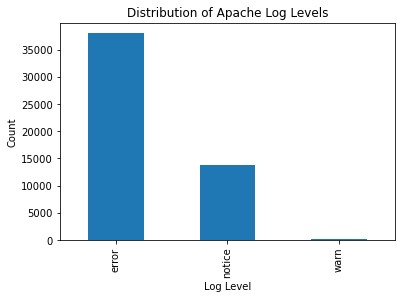

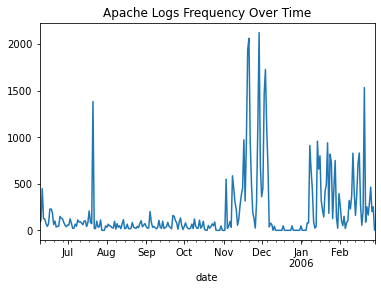

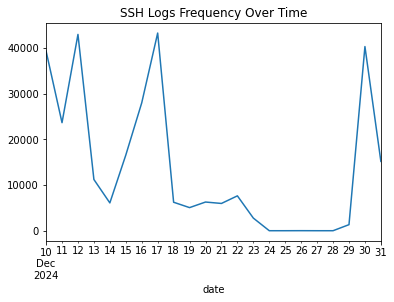

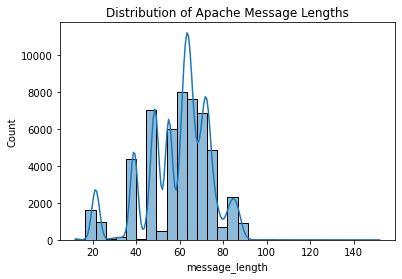

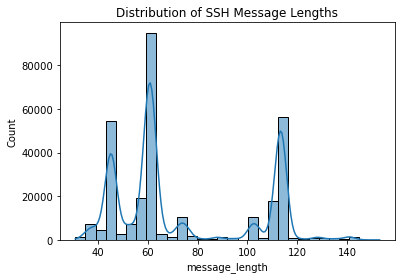

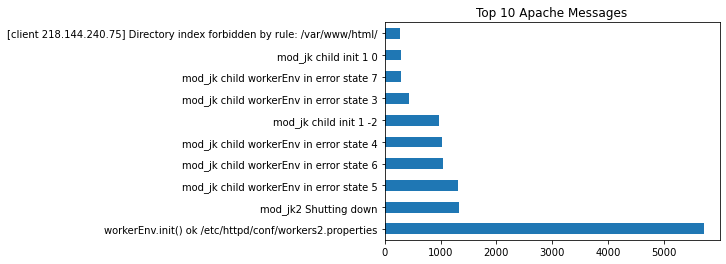

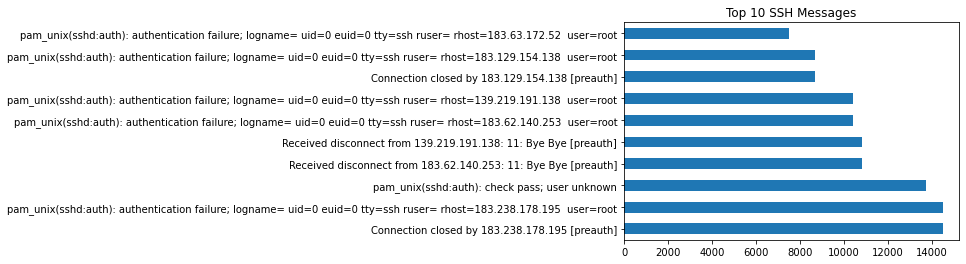

In [5]:
#Step1: Basic Info 
print("Apache log file")
print(df_apache.info())
print("\nSSH Logs Info:")
print(df_ssh.info())

#Step2: Checking for missing values
print("Missing values in Apache log")
print(df_apache.isnull().sum())
print("Missing values in SSH log")
print(df_ssh.isnull().sum())

#Step3: Basic statistics on message lengths
print("Apache logs length statistics ")
print(df_apache['message_length'].describe())
print("SSH logs length statistics ")
print(df_ssh['message_length'].describe())

#Step4: Distribution of log levels in Apache
log_level_counts = df_apache['log_level'].value_counts()
log_level_counts.plot(kind='bar')
plt.title('Distribution of Apache Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.show()

#Step5: Frequence of logs over time
df_apache.set_index('date').resample('D').size().plot(title='Apache Logs Frequency Over Time', kind='line')
plt.show()
df_ssh.set_index('date').resample('D').size().plot(title='SSH Logs Frequency Over Time', kind='line')
plt.show()

# Step 6: Message length distribution
sns.histplot(df_apache['message_length'], kde=True, bins=30)
plt.title('Distribution of Apache Message Lengths')
plt.show()

sns.histplot(df_ssh['message_length'], kde=True, bins=30)
plt.title('Distribution of SSH Message Lengths')
plt.show()

# Step 7: Most common messages
common_apache_messages = df_apache['message'].value_counts().head(10)
common_ssh_messages = df_ssh['message'].value_counts().head(10)

common_apache_messages.plot(kind='barh')
plt.title('Top 10 Apache Messages')
plt.show()

common_ssh_messages.plot(kind='barh')
plt.title('Top 10 SSH Messages')
plt.show()